In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
# from scipy.signal import savgol_filter

$$\frac{1}{C^2} = \frac{2}{q\epsilon_0\epsilon_sA^2}\frac{V_{DC}}{N_d} + \frac{2}{q\epsilon_0\epsilon_sA^2}\frac{V_{bi}}{N_d}$$
$$\frac{1}{C^2} = \alpha\frac{V_{DC}}{N_d} + \alpha\frac{V_{bi}}{N_d}$$


In [15]:
A = (5.2*3.6)*1e-4 # m^2
alpha = 2/(1.6e-19*8.85e-12*11.7*A**2)
del_alpha = alpha*(2*1e-6/A)
alpha, del_alpha

(3.4448410820135724e+34, 3.6803857713820208e+31)

In [19]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt = linregress(xs, ys)
    xinter = -popt.intercept/popt.slope
    xFit = np.arange(xinter, max(xs), 2e-4)

    Nd = alpha/popt.slope
    del_Nd = Nd*np.sqrt((popt.stderr/popt.slope)**2 + (del_alpha/alpha)**2)
    Vbi = (popt.intercept*Nd)/alpha
    del_Vbi = Vbi*np.sqrt((popt.intercept_stderr/popt.intercept)**2 + (del_Nd/Nd)**2 + (del_alpha/alpha)**2)

    label = f'For the best fit line (r-value = {popt.rvalue:.3f}):\nslope = {popt.slope:.3e} ± {popt.stderr:.3e}'  + f'\nintercept = {popt.intercept:.3e} ± {popt.intercept_stderr:.3e}' 
    return xFit, straight_line(xFit, popt.slope, popt.intercept), (Nd, Vbi), (del_Nd, del_Vbi), label

# dark

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


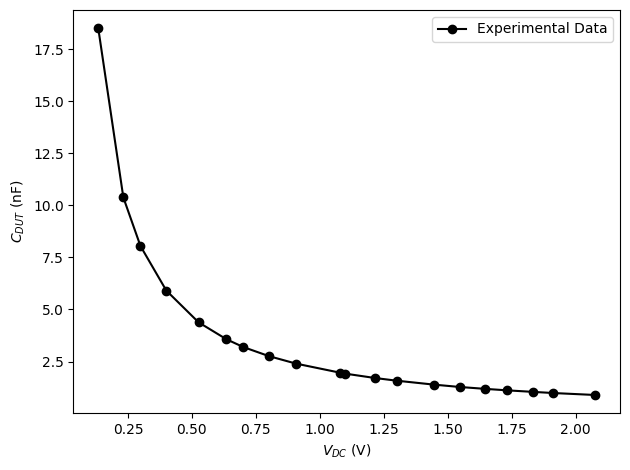

In [12]:
data = pd.read_excel('data.xlsx', sheet_name='dark')
# plt.figure(figsize=(5,4))
x1 = np.array(data['vdc'])[1:]
y1 = np.array(data['cdut'])[1:]*1e9
plt.plot(x1, y1, '-ko', label='Experimental Data')
plt.legend()
plt.xlabel(r'$V_{DC}$ (V)')
plt.ylabel(r'$C_{DUT}$ (nF)')
plt.tight_layout()
plt.savefig('images/dark0.eps')

Nd = 2.984e+16 \pm 1.113e+15 
Vbi = 1.022 \pm 0.076 V


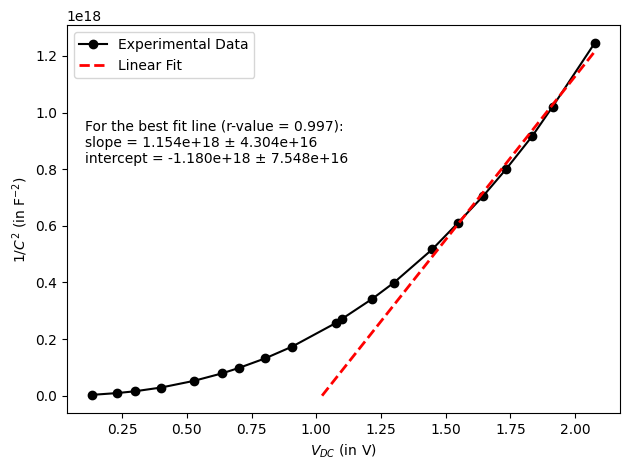

In [23]:
data = pd.read_excel('data.xlsx', sheet_name='dark')
# plt.figure(figsize=(5,4))
x1 = np.array(data['vdc'])
y1 = np.array(data['1/cdut^2'])
plt.plot(x1, y1, '-ko', label='Experimental Data')

a, b = 1.4, 3
roi = np.where((x1 < b) & (x1 > a))
xx, yy, params, errs, label = fit_line(x1[roi], y1[roi])
print(f'Nd = {params[0]:.3e} \pm {errs[0]:.3e} \nVbi = {-params[1]:.3f} \pm {-errs[1]:.3f} V')
plt.plot(xx,yy, 'r--', linewidth=2, label='Linear Fit')

plt.legend()
plt.xlabel(r'$V_{DC}$ (in V)')
plt.ylabel(r'$1/C^2$ (in F$^{-2}$)')
plt.text(0.14,0.65,label,transform=plt.gcf().transFigure)
plt.tight_layout()
# plt.savefig('images/dark.eps')

# light

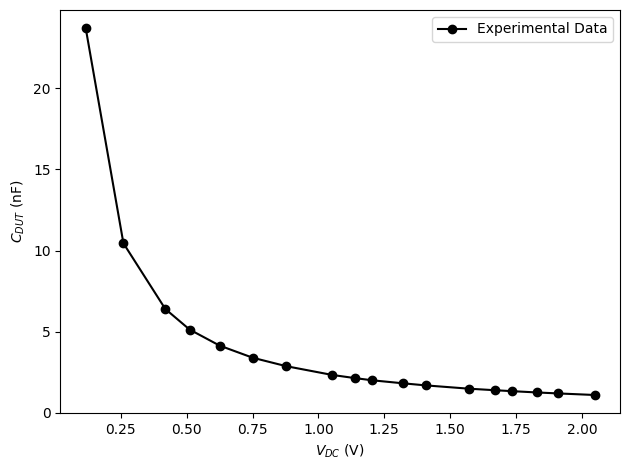

In [27]:
data = pd.read_excel('data.xlsx', sheet_name='not dark again')
# plt.figure(figsize=(5,4))
x1 = np.array(data['vdc'])[1:]
y1 = np.array(data['cdut'])[1:]*1e9
plt.plot(x1, y1, '-ko', label='Experimental Data')
plt.legend()
plt.xlabel(r'$V_{DC}$ (V)')
plt.ylabel(r'$C_{DUT}$ (nF)')
plt.tight_layout()
# plt.savefig('images/light0.eps')

Nd = 4.588e+16 \pm 1.847e+15 
Vbi = 0.963 \pm 0.080 V


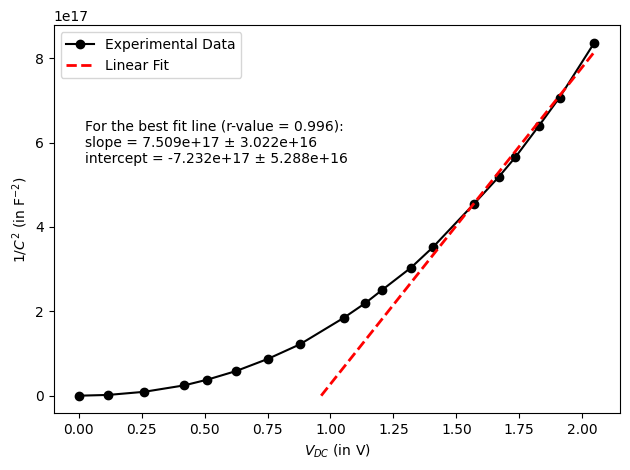

In [25]:
data = pd.read_excel('data.xlsx', sheet_name='not dark again')
# plt.figure(figsize=(5,4))
x1 = np.array(data['vdc'])
y1 = np.array(data['1/cdut^2'])
plt.plot(x1, y1, '-ko', label='Experimental Data')

a, b = 1.4, 3
roi = np.where((x1 < b) & (x1 > a))
xx, yy, params, errs, label = fit_line(x1[roi], y1[roi])
print(f'Nd = {params[0]:.3e} \pm {errs[0]:.3e} \nVbi = {-params[1]:.3f} \pm {-errs[1]:.3f} V')
plt.plot(xx,yy, 'r--', linewidth=2, label='Linear Fit')

plt.legend()
plt.xlabel(r'$V_{DC}$ (in V)')
plt.ylabel(r'$1/C^2$ (in F$^{-2}$)')
plt.text(0.14,0.65,label,transform=plt.gcf().transFigure)
plt.tight_layout()
# plt.savefig('images/light.eps')